# ICP

<a href="https://colab.research.google.com/github/LinkHS/Colab/blob/main/Open3D/ICP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dependencies

In [ ]:
# !pip install open3d
# !git clone https://github.com/intel-isl/Open3D

In [ ]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

## Load pcd files

In [ ]:
source = o3d.io.read_point_cloud("Open3D/examples/test_data/ICP/cloud_bin_0.pcd")
target = o3d.io.read_point_cloud("Open3D/examples/test_data/ICP/cloud_bin_1.pcd")

两组点云数量不一样：

In [ ]:
points = np.asarray(source.points)
points_tgt = np.asarray(target.points)
points.shape, points_tgt.shape

((198835, 3), (137833, 3))

点云每个点都有颜色，可以直接被用来画图：

In [ ]:
source.colors

std::vector<Eigen::Vector3d> with 198835 elements.
Use numpy.asarray() to access data.

In [12]:
import plotly.graph_objects as go

def showCloudPoint(open3d_cloudpoints):
  """
  Usage: showCloudPoint(a), showCloudPoint((a, b))

  Bug：当总点云数量过大时（336668）在colab中不显示，可以降采样，如下：
   sum = (a + b).voxel_down_sample(voxel_size=0.05)
   showCloudPoint(sum)

  Parameters:
   @open3d_cloudpoint_lst: a single or a list of open3d.cpu.pybind.geometry.PointCloud
  """
  if not (isinstance(open3d_cloudpoints, list) or isinstance(open3d_cloudpoints, tuple)):
    open3d_cloudpoints = [open3d_cloudpoints]

  ready_data = []
  for open3d_pcd in open3d_cloudpoints:
    print(open3d_pcd)
    np_pcd = np.asarray(open3d_pcd.points)
    colors = np.asarray(open3d_pcd.colors)
    x, y, z = np_pcd[:, 0], np_pcd[:, 1], np_pcd[:, 2]
    scatter_3d = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=1, color=colors))
    ready_data.append(scatter_3d)
  fig = go.Figure(ready_data)
  fig.show()

# showCloudPoint(source)

由于显示三维数据过于庞大，所以仅展示截图效果：

![](https://images-picgo.oss-cn-shanghai.aliyuncs.com/images/Colab/20210812172016.png)

In [13]:
# showCloudPoint(target)

![](https://images-picgo.oss-cn-shanghai.aliyuncs.com/images/Colab/20210812172208.png)

# Test

In [ ]:
a = source + target
a = a.voxel_down_sample(voxel_size=0.05)

# Backups

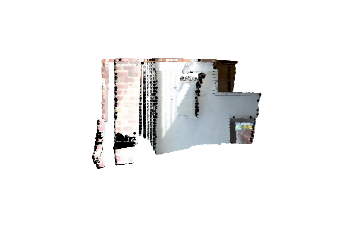

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import open3d as o3d

cloud = o3d.io.read_point_cloud("Open3D/examples/test_data/ICP/cloud_bin_0.pcd")
points = np.asarray(cloud.points)
colors = None

if cloud.has_colors():
  colors = np.asarray(cloud.colors)
elif cloud.has_normals():
  colors = (0.5, 0.5, 0.5) + np.asarray(cloud.normals) * 0.5
else:
  geometry.paint_uniform_color((1.0, 0.0, 0.0))
  colors = np.asarray(geometry.colors)

# Single View
# Single View
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(projection='3d')
ax.view_init(90, -90)
ax.axis("off")
ax.scatter(points[:,0], points[:,1], points[:,2], s=1, c=colors)
plt.show()

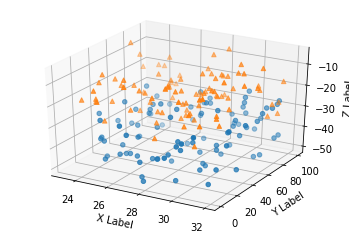

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()